### 2. Mask construction to ignore Galactic Plane

We define a mask for $\pm 10^\circ$ off the galactic equator to avoid contamination from unwanted galactic sources.

As we are working in Fourier space its important that we *apodize* the mask, that is, we smooth it over $5^\circ$ degrees to avoid spurious modes arising from discontinuities.

At the end we are essentially saving a boolean array.

In [2]:
import healpy as hp
import numpy as np
import pymaster as nmt
import matplotlib.pyplot as plt

In [11]:
nside = 512
npix = hp.nside2npix(nside)  # total number of pixels
aposcale = 5  # degrees for apodization 

gb = hp.pix2ang(nside, np.arange(npix), lonlat=True)[1]  # galactic coords

# define mask
mask_galcut10 = np.where(np.abs(gb) < 10.0, 0.0, 1.0)

# apodize it
mask_galcut10_apodC2_5 = nmt.mask_apodization(mask_galcut10, aposcale, apotype="C2")

# save it
hp.write_map('../results/masks/mask_galcut10_apodC2_5.fits', mask_galcut10_apodC2_5, dtype='int32', overwrite=True)

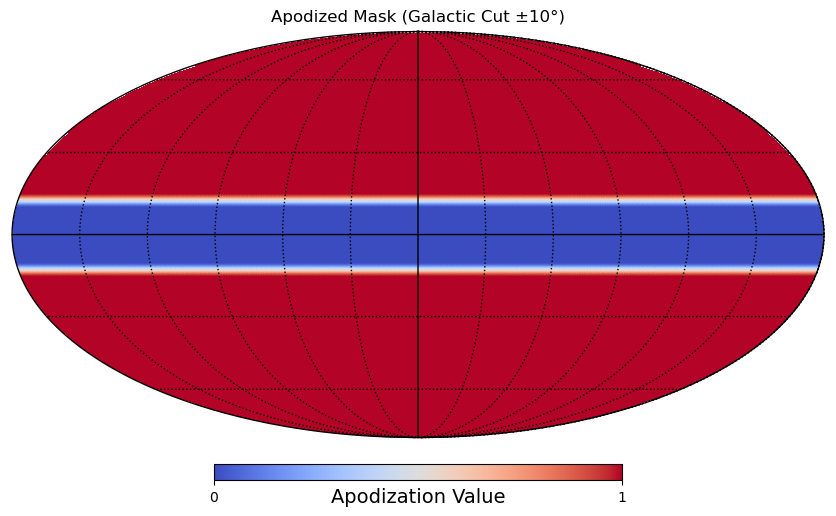

In [15]:
# plot it

hp.mollview(
    mask_galcut10_apodC2_5,
    title="Apodized Mask (Galactic Cut ±10°)",
    cmap="coolwarm",
    unit="Apodization Value",
)
hp.graticule() 
plt.show()